# Metody rożniczkowania

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import sympy

**Zadanie 1.** 

Rozważmy funkcję $f(x)=\sqrt{\operatorname{tg}^2(x)+1}-\operatorname{tg}(x)$. Zaimplementuj ją w Pythonie oraz narysuj jej wykres w przedziale $[-2\pi, 2\pi]$.

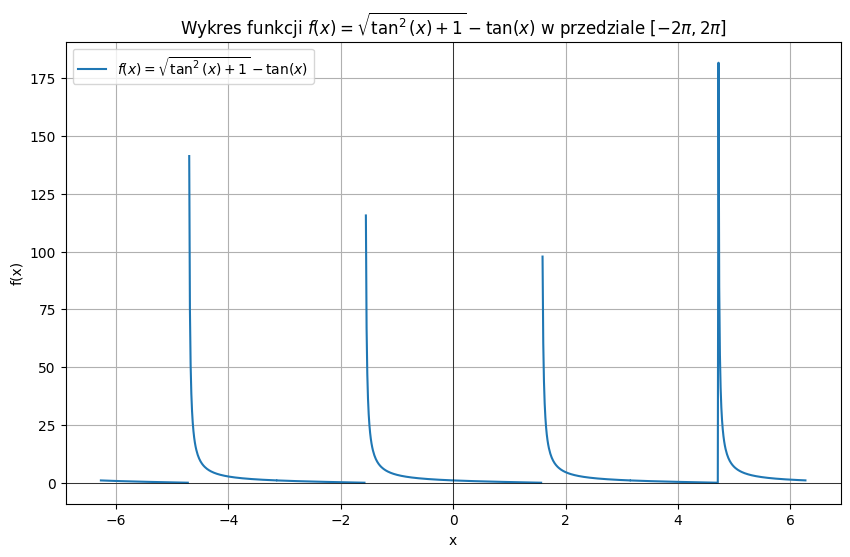

In [11]:
# Definicja funkcji f(x)
def f(x):
    return np.sqrt(np.tan(x)**2 + 1) - np.tan(x)

# Zakres wartości x
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

# Obliczenie wartości f(x) z uwzględnieniem przypadków, gdy tan(x) nie jest zdefiniowane
y = f(x)

# Maskowanie miejsc, gdzie funkcja nie jest zdefiniowana (przy asymptotach)
y[np.abs(x % (np.pi / 2)) < 0.01] = np.nan

# Rysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x)=\sqrt{\tan^2(x)+1} - \tan(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Wykres funkcji $f(x)=\sqrt{\tan^2(x)+1} - \tan(x)$ w przedziale $[-2\pi, 2\pi]$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.show()

**Zadanie 2.**

Zaimplementuj wybrane metody różniczkowania numerycznego (co najmniej 4) przedstawione na wykładzie i porównaj dokładność wyznaczania za ich pomocą pochodnej funkcji z zadania 1. Skoncentruj się na pochodnych dla wartości leżących w pobliżu punktu $\frac{\pi}{2}+k\pi$. W porównaniu wykorzystaj błąd względy. Za wartość dokładną możesz przyjąć wartość pochodnej $f(x)$ obliczoną analitycznie ($f^{\prime}(x)=\operatorname{tg}(x) \sqrt{\operatorname{tg}^2(x)+1}-\left(\operatorname{tg}^2(x)+1\right)$) lub wyznaczoną za pomocą pakietu SymPy
.

In [16]:
from sympy import symbols, tan, sqrt, diff, lambdify, pi

# Definicja funkcji f(x)
def f(x):
    return np.sqrt(np.tan(x)**2 + 1) - np.tan(x)

# Definicja analitycznej pochodnej f'(x) za pomocą SymPy
x = symbols('x')
f_expr = sqrt(tan(x)**2 + 1) - tan(x)
f_prime_expr = diff(f_expr, x)
f_prime = lambdify(x, f_prime_expr, 'numpy')

# Metody różniczkowania numerycznego
def forward_difference(f, x, h):
    return (f(x + h) - f(x)) / h

def backward_difference(f, x, h):
    return (f(x) - f(x - h)) / h

def central_difference(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_order_central_difference(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12 * h)

# Punkt w pobliżu którego porównujemy metody różniczkowania
points = [np.pi/2 + k*np.pi for k in range(-2, 3)]

# Wartości kroku h
h = 1e-7  # Zmniejszenie kroku h dla większej dokładności

# Porównanie metod różniczkowania numerycznego
results = {}
for point in points:
    exact = f_prime(point)
    fd = forward_difference(f, point, h)
    bd = backward_difference(f, point, h)
    cd = central_difference(f, point, h)
    socd = second_order_central_difference(f, point, h)
    results[point] = {
        'exact': exact,
        'forward_difference': fd,
        'backward_difference': bd,
        'central_difference': cd,
        'second_order_central_difference': socd
    }

# Obliczenie błędu względnego dla każdej metody
errors = {}
for point in points:
    exact = results[point]['exact']
    if exact != 0:
        errors[point] = {
            'forward_difference': abs(results[point]['forward_difference'] - exact) / abs(exact),
            'backward_difference': abs(results[point]['backward_difference'] - exact) / abs(exact),
            'central_difference': abs(results[point]['central_difference'] - exact) / abs(exact),
            'second_order_central_difference': abs(results[point]['second_order_central_difference'] - exact) / abs(exact)
        }
    else:
        errors[point] = {
            'forward_difference': abs(results[point]['forward_difference']),
            'backward_difference': abs(results[point]['backward_difference']),
            'central_difference': abs(results[point]['central_difference']),
            'second_order_central_difference': abs(results[point]['second_order_central_difference'])
        }

# Wypisanie wyników
for point in points:
    print(f"Point: {point}")
    print(f"Exact derivative: {results[point]['exact']}")
    print(f"Forward difference: {results[point]['forward_difference']}, Relative error: {errors[point]['forward_difference']}")
    print(f"Backward difference: {results[point]['backward_difference']}, Relative error: {errors[point]['backward_difference']}")
    print(f"Central difference: {results[point]['central_difference']}, Relative error: {errors[point]['central_difference']}")
    print(f"Second-order central difference: {results[point]['second_order_central_difference']}, Relative error: {errors[point]['second_order_central_difference']}")
    print()


Point: -4.71238898038469
Exact derivative: -5.926875084696824e+31
Forward difference: -1.0887492882130246e+23, Relative error: 0.9999999981630299
Backward difference: 1.0887492902130246e+23, Relative error: 1.0000000018369701
Central difference: 99999999535871.34, Relative error: 1.0
Second-order central difference: 124999999375177.8, Relative error: 1.0

Point: -1.5707963267948966
Exact derivative: -5.334187576227143e+32
Forward difference: -3.266247868639074e+23, Relative error: 0.9999999993876767
Backward difference: 3.266247870639074e+23, Relative error: 1.0000000006123233
Central difference: 99999999880380.6, Relative error: 1.0
Second-order central difference: 124999999838672.61, Relative error: 1.0

Point: 1.5707963267948966
Exact derivative: 0.0
Forward difference: 200000000005691.06, Relative error: 200000000005691.06
Backward difference: -0.5029141902923584, Relative error: 0.5029141902923584
Central difference: 100000000002845.27, Relative error: 100000000002845.27
Second-or

**Zadanie 3.**

W oparciu o dane z wykładu zaimplementuj metodę różniczkowania automatycznego za pomocą liczb dualnych. W tym celu uzupełnij definicję pokazanej poniżej klasy, przygotuj kilka funkcji pracujących na liczbach dualnych oraz sprawdź poprawność działania Twojej implementacji na wybranych przykładach.

In [21]:
class Dual:
    def __init__(self, fst, snd):
        self.fst = fst
        self.snd = snd
        
    def __str__(self):
        return f"({self.fst},{self.snd})"
    
    def __add__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst + o.fst, self.snd + o.snd)
        else:
            return Dual(self.fst + o, self.snd)
    
    def __radd__(self, o):
        return self.__add__(o)
    
    def __sub__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst - o.fst, self.snd - o.snd)
        else:
            return Dual(self.fst - o, self.snd)
    
    def __rsub__(self, o):
        return Dual(o - self.fst, -self.snd)
    
    def __mul__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst * o.fst, self.fst * o.snd + self.snd * o.fst)
        else:
            return Dual(self.fst * o, self.snd * o)
    
    def __rmul__(self, o):
        return self.__mul__(o)
    
    def __truediv__(self, o):
        if isinstance(o, Dual):
            return Dual(self.fst / o.fst, (self.snd * o.fst - self.fst * o.snd) / (o.fst ** 2))
        else:
            return Dual(self.fst / o, self.snd / o)
    
    def __rtruediv__(self, o):
        return Dual(o, 0) / self

# Funkcje matematyczne działające na liczbach dualnych
def sin(dual):
    return Dual(np.sin(dual.fst), dual.snd * np.cos(dual.fst))

def cos(dual):
    return Dual(np.cos(dual.fst), -dual.snd * np.sin(dual.fst))

def exp(dual):
    return Dual(np.exp(dual.fst), dual.snd * np.exp(dual.fst))

def sqrt(dual):
    sqrt_fst = np.sqrt(dual.fst)
    return Dual(sqrt_fst, dual.snd / (2 * sqrt_fst))
        

In [22]:
a = Dual(np.pi,1) # definiuję x jako zmienną i przypisuję jej wartość pi
b = sin(a) # wartość sinusa oraz jego pochodnej, wynikiem powinno być (sin(pi), cos(pi))
print(b)


(1.2246467991473532e-16,-1.0)
